In [2]:
# Importa las librerías necesarias para el análisis y modelado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Carga el dataset de viviendas desde el archivo CSV
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Muestra información general del dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Estadísticas descriptivas de las variables numéricas
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

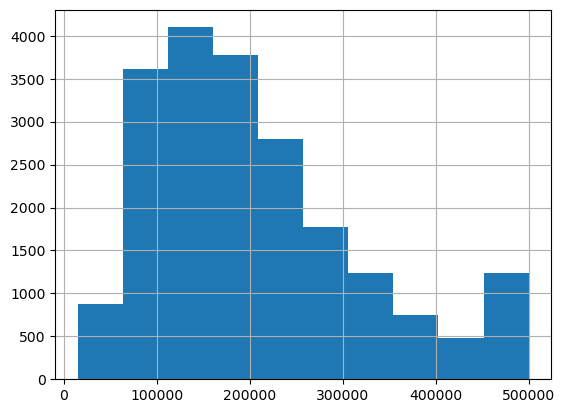

In [12]:
# Visualiza la distribución de la variable 'median_house_value'
housing['median_house_value'].hist()

<Axes: xlabel='median_income', ylabel='median_house_value'>

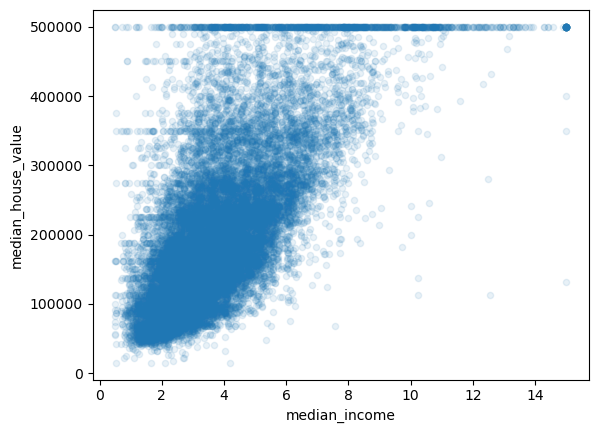

In [13]:
# Visualiza la relación entre 'median_income' y 'median_house_value'
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

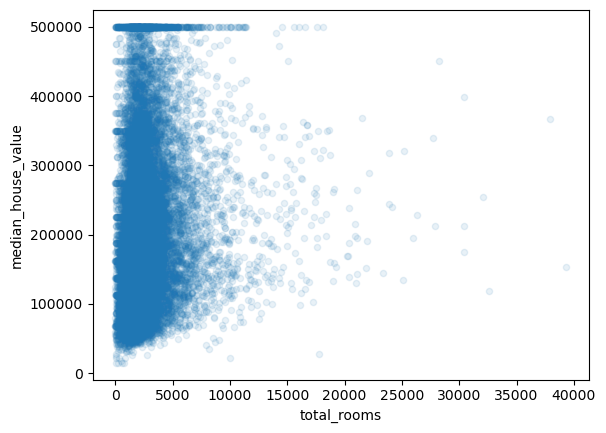

In [14]:
# Visualiza la relación entre 'total_rooms' y 'median_house_value'
housing.plot(kind='scatter', x='total_rooms', y='median_house_value', alpha=0.1)

In [15]:
# Selecciona las variables relevantes para el modelo
features = ['median_income', 'total_rooms', 'housing_median_age']
X = housing[features]
y = housing['median_house_value']

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>]],
      dtype=object)

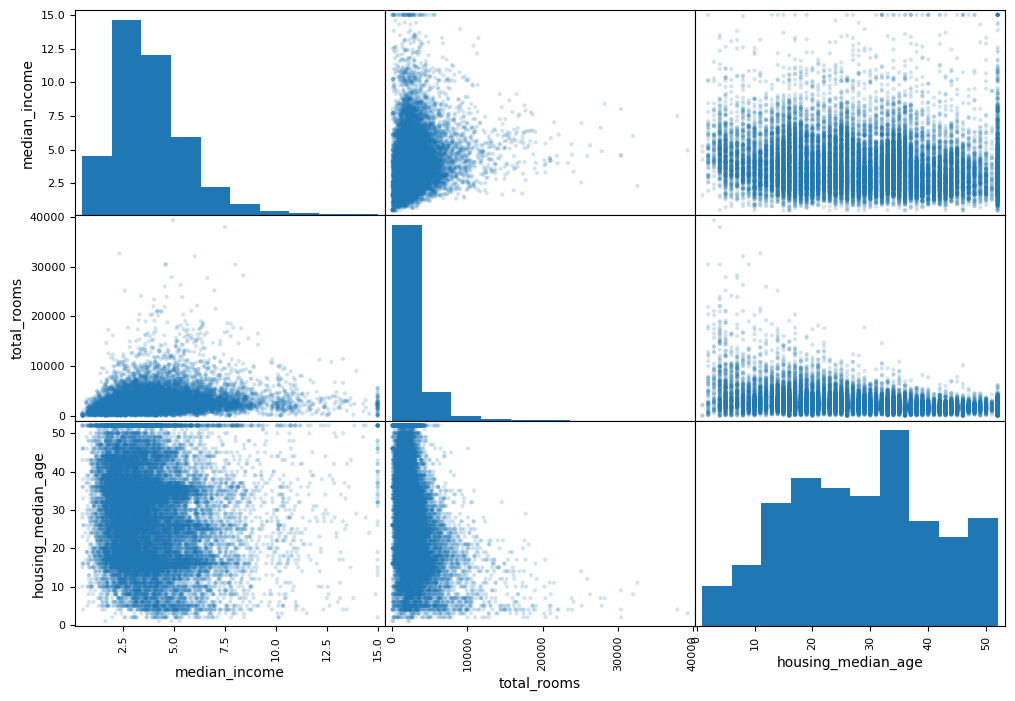

In [16]:
# Visualiza la correlación entre las variables seleccionadas
pd.plotting.scatter_matrix(housing[features], figsize=(12, 8), alpha=0.2)

In [18]:
# Divide el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Crea y entrena el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Evalúa el modelo en el conjunto de prueba
score = model.score(X_test, y_test)
print(f"R^2 en test: {score}")

R^2 en test: 0.4991503592397153


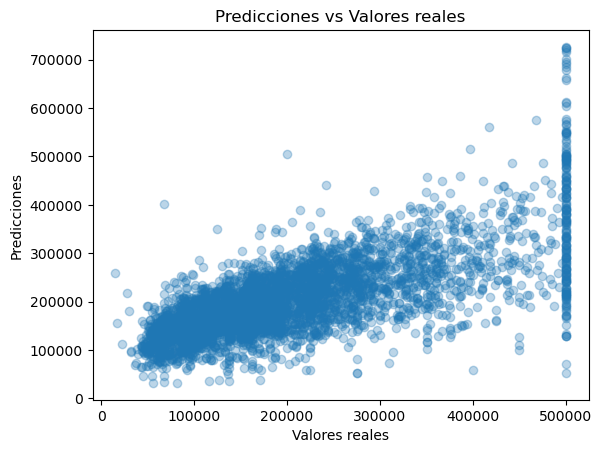

In [22]:
# Visualiza las predicciones vs valores reales
predictions = model.predict(X_test)
plt.scatter(y_test, predictions, alpha=0.3)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

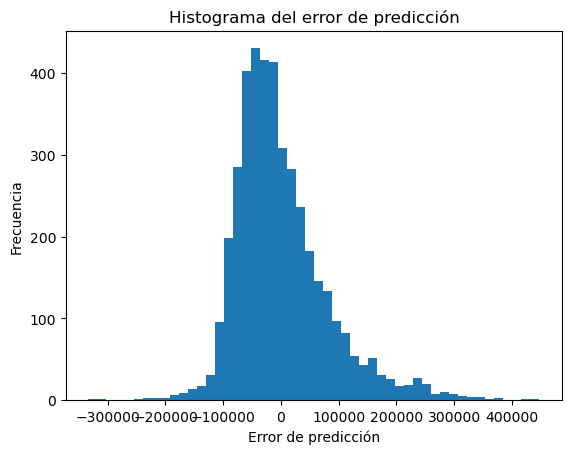

In [23]:
# Visualiza el error de predicción
error = y_test - predictions
plt.hist(error, bins=50)
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma del error de predicción')
plt.show()

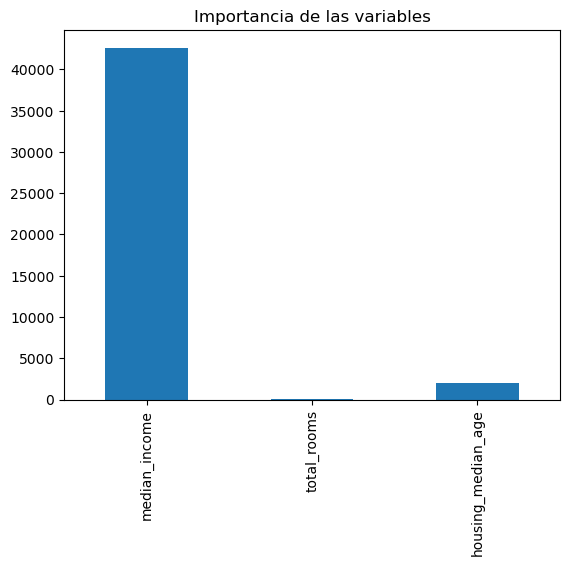

In [24]:
# Visualiza la importancia de cada variable en el modelo
importancia = pd.Series(model.coef_, index=features)
importancia.plot(kind='bar')
plt.title('Importancia de las variables')
plt.show()

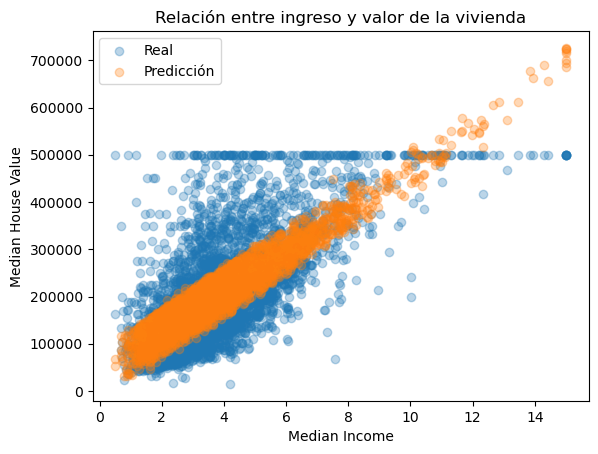

In [25]:
# Visualiza la relación entre la variable más importante y el valor de la vivienda
plt.scatter(X_test['median_income'], y_test, alpha=0.3, label='Real')
plt.scatter(X_test['median_income'], predictions, alpha=0.3, label='Predicción')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Relación entre ingreso y valor de la vivienda')
plt.show()

In [26]:
# Muestra los coeficientes del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficientes: [4.26533268e+04 3.85104556e+00 1.97574393e+03]
Intercepto: -25029.511934195034


In [27]:
# Realiza una predicción con nuevos datos de ejemplo
nuevo = pd.DataFrame({'median_income': [5], 'total_rooms': [3000], 'housing_median_age': [30]})
prediccion_nueva = model.predict(nuevo)
print('Predicción para nuevos datos:', prediccion_nueva)

Predicción para nuevos datos: [259062.57674488]


In [28]:
# Guarda el modelo entrenado en un archivo
import joblib
joblib.dump(model, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

In [ ]:
# Carga el modelo guardado y realiza una predicción
modelo_cargado = joblib.load('modelo_regresion_lineal.pkl')
prediccion_cargada = modelo_cargado.predict(nuevo)
print('Predicción con modelo cargado:', prediccion_cargada)

In [29]:
# Visualiza la predicción en un gráfico interactivo
import plotly.express as px
df_pred = pd.DataFrame({'median_income': X_test['median_income'], 'Predicción': predictions, 'Real': y_test})
fig = px.scatter(df_pred, x='median_income', y=['Predicción', 'Real'], title='Predicción vs Real (Plotly)')
fig.show()

In [30]:
# Manejo de errores al cargar el modelo
try:
    modelo_cargado = joblib.load('modelo_regresion_lineal.pkl')
    print('Modelo cargado correctamente')
except Exception as e:
    print('Error al cargar el modelo:', e)

Modelo cargado correctamente


In [31]:
# Muestra la versión de las librerías utilizadas
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
import sklearn
print('Scikit-learn:', sklearn.__version__)

Pandas: 2.2.2
Numpy: 1.26.4
Scikit-learn: 1.5.1
